# Raster Tensors

## Imports

In [27]:
import sys
import os
import IPython
# from IPython.display import Image
# from IPython.core.display import HTML
from IPython.display import clear_output

In [2]:
import numpy as np
import pandas as pd
import polars as pr # new pkg similar to pandas but faster
import glob

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # e.g. default 100 but 300 would be a really fine plot, but slower
import seaborn as sns
import plotly
from PIL import Image

In [4]:
import re
import random
import time
import scipy
from tqdm.notebook import tqdm # FOR FANCY GREEN BAR
import statsmodels.api as sm

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, random_split, DataLoader
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

## Data

In [6]:
random.seed(77)
SIZE = 50
m = 0.5

## X

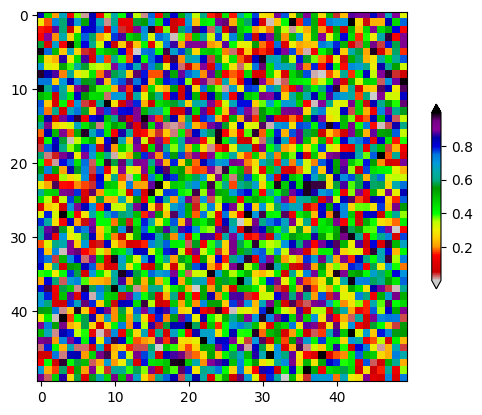

In [7]:
# clear_output(wait=True)
X = torch.rand(SIZE, SIZE)
plt.imshow(X, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

In [8]:
print(X)
X.shape

tensor([[0.8319, 0.4581, 0.2045,  ..., 0.6626, 0.8956, 0.3135],
        [0.2952, 0.1793, 0.7304,  ..., 0.8430, 0.4569, 0.7553],
        [0.1579, 0.1352, 0.8859,  ..., 0.5314, 0.7983, 0.1527],
        ...,
        [0.1513, 0.4008, 0.0689,  ..., 0.5227, 0.6194, 0.2201],
        [0.7018, 0.2228, 0.1718,  ..., 0.6269, 0.1222, 0.3620],
        [0.9296, 0.0287, 0.4685,  ..., 0.7229, 0.0923, 0.7434]])


torch.Size([50, 50])

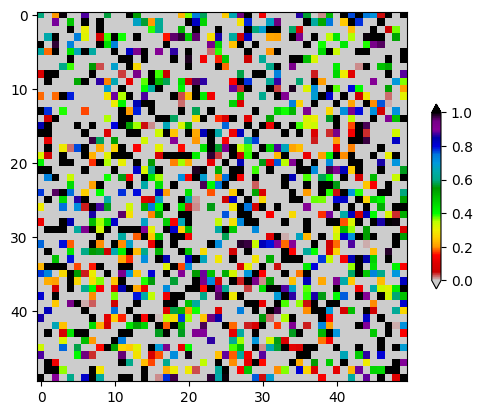

In [9]:
X_clip = np.random.randn(SIZE, SIZE).clip(0, 1)
plt.imshow(X_clip, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

In [10]:
print(X_clip)
X_clip.shape

[[0.59564904 0.         0.2030108  ... 1.         0.         1.        ]
 [0.         0.         0.89130122 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05127501 0.37044904 0.        ]
 ...
 [0.         1.         0.13243242 ... 0.         1.         0.89742497]
 [0.         1.         1.         ... 1.         1.         0.        ]
 [1.         0.         0.9015889  ... 0.         0.10424603 1.        ]]


(50, 50)

## Y

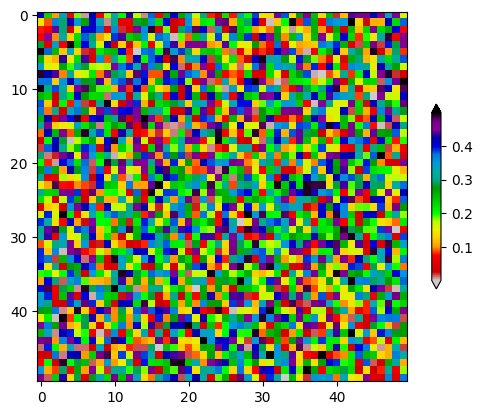

In [11]:
Y = 0.5*X
plt.imshow(Y, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

/tmp/ipykernel_3667/599915668.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = np.cos(X)


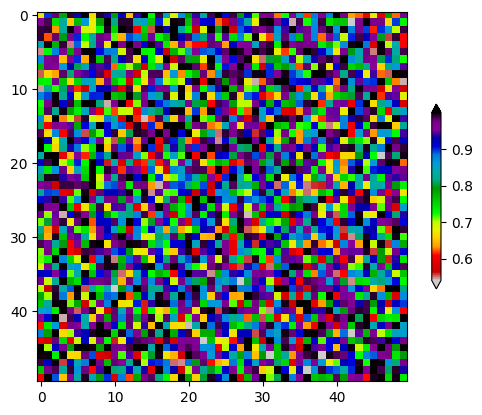

In [12]:
Y = np.cos(X)
plt.imshow(Y, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

## Circular waves from center

/tmp/ipykernel_3667/2675134965.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * X * np.sin(r * 0.3)


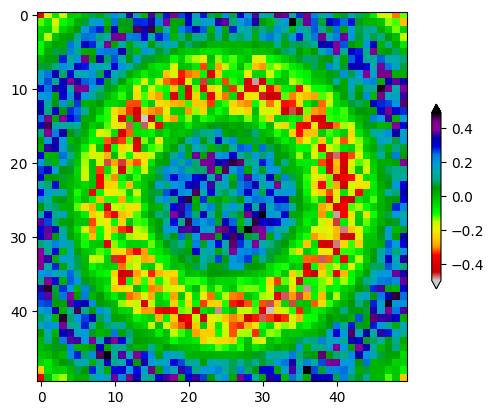

In [13]:
center = 25
r = np.sqrt((np.arange(50)[:, None] - center)**2 + (np.arange(50) - center)**2)
Y = m * X * np.sin(r * 0.3)

plt.imshow(Y, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

/tmp/ipykernel_3667/1164542852.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * X * np.sin(radius * 0.2 + angle * 3)


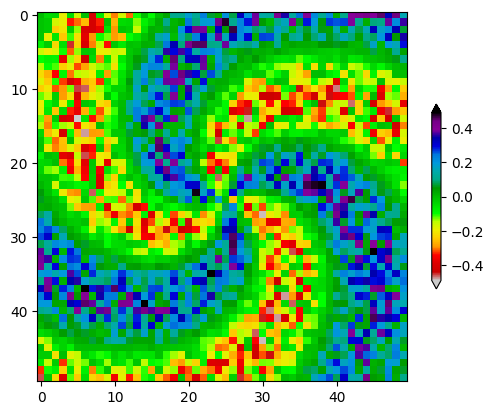

In [14]:
# Spiral pattern
i, j = np.meshgrid(np.arange(50), np.arange(50))
angle = np.arctan2(i - 25, j - 25)
radius = np.sqrt((i - 25)**2 + (j - 25)**2)
Y = m * X * np.sin(radius * 0.2 + angle * 3)

plt.imshow(Y, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

## Mandala-like pattern

/tmp/ipykernel_3667/1555902444.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * X * np.cos(radius * 0.5) * np.sin(angle * 6)


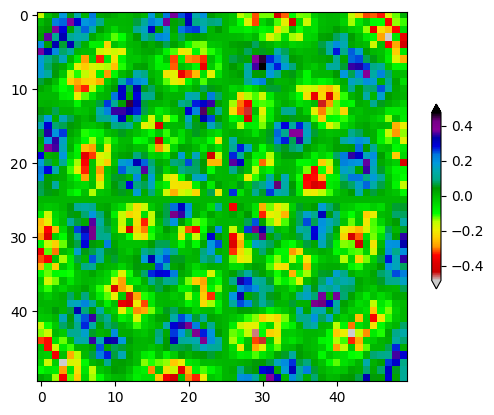

In [15]:
Y = m * X * np.cos(radius * 0.5) * np.sin(angle * 6)

plt.imshow(Y, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

## Radial gradient

/tmp/ipykernel_3667/259975619.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * X * (1 - radius / 30)  # Fades from center


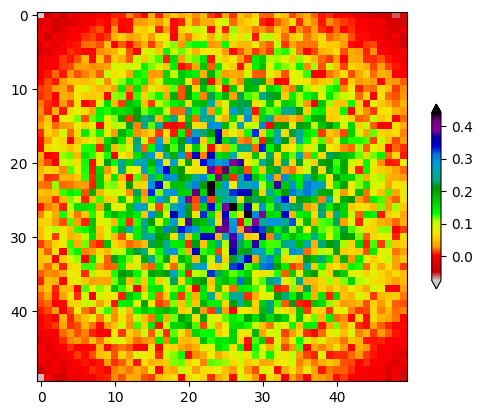

In [16]:
Y = m * X * (1 - radius / 30)  # Fades from center

plt.imshow(Y, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

## Linear gradients

/tmp/ipykernel_3667/1584912862.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * X * (i / 50)  # Horizontal gradient
/tmp/ipykernel_3667/1584912862.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * X * np.sqrt(i**2 + j**2) / 70  # Diagonal gradient


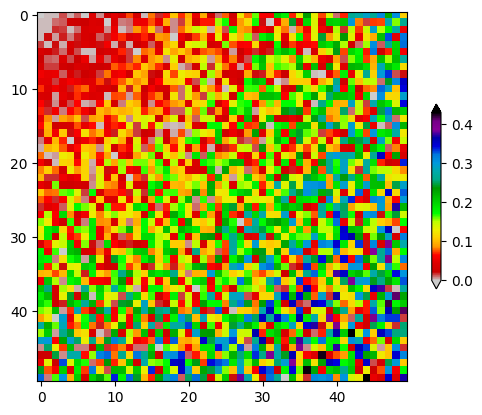

In [17]:
Y = m * X * (i / 50)  # Horizontal gradient
Y = m * X * np.sqrt(i**2 + j**2) / 70  # Diagonal gradient

plt.imshow(Y, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

## Concentric diamonds

/tmp/ipykernel_3667/932661511.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * X * np.sin(diamond_dist * 0.2)


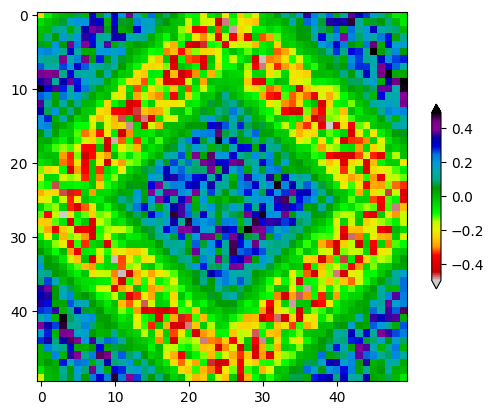

In [18]:
diamond_dist = np.abs(i - 25) + np.abs(j - 25)
Y = m * X * np.sin(diamond_dist * 0.2)

plt.imshow(Y, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

## Image Masking

/tmp/ipykernel_3667/2053544024.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * (X + photo_array)  # Additive combination


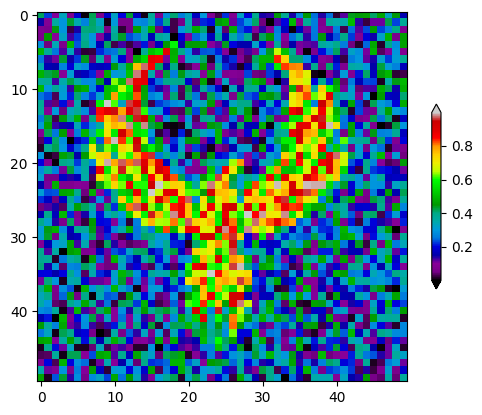

In [22]:
# Load and resize photo to 50x50
img = Image.open('./data/bird.png').convert('L')  # Convert to grayscale
img_resized = img.resize((50, 50))
photo_array = np.array(img_resized) / 255.0  # Normalize to 0-1

# Now combine your tensor X with the photo
# Y = m * X * photo_array  # Your tensor modulated by photo brightness
# # Or
Y = m * (X + photo_array)  # Additive combination
# # Or
# Y = m * X * (1 + 0.5 * photo_array)  # Photo as texture overlay


plt.imshow(Y, cmap='nipy_spectral') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

/tmp/ipykernel_3667/2276021168.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Y = m * (X + photo_array)  # Additive combination


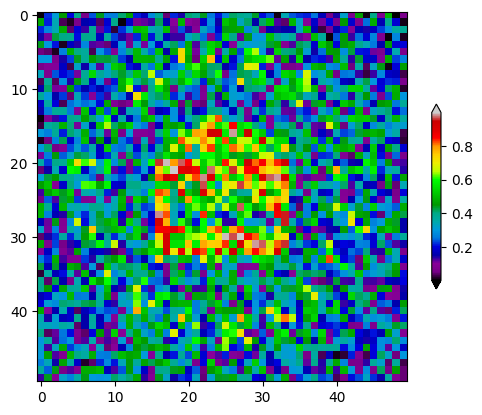

In [33]:
# Load and resize photo to 500x500
SIZE = 50

X = torch.rand(SIZE, SIZE)

img = Image.open('./data/Umeå2.png').convert('L')  # Convert to grayscale
img_resized = img.resize((SIZE, SIZE))
photo_array = np.array(img_resized) / 255.0  # Normalize to 0-1

# Now combine your tensor X with the photo
# Y = m * X * photo_array  # Your tensor modulated by photo brightness
# # Or
Y = m * (X + photo_array)  # Additive combination
# # Or
# Y = m * X * (1 + 0.5 * photo_array)  # Photo as texture overlay


plt.imshow(Y, cmap='nipy_spectral') # icefire_r, nipy_spectral_r
plt.colorbar(shrink=0.5, extend='both')
plt.show()

## Looping

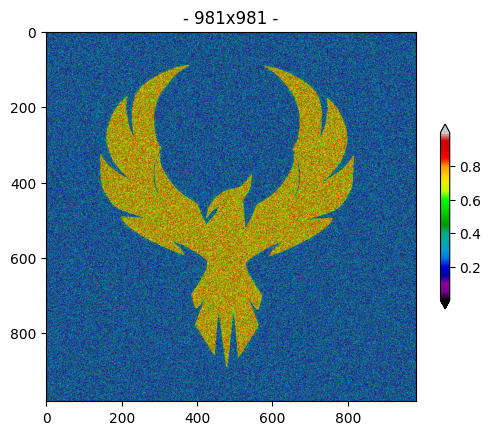

In [24]:
SIZE = 1000
img = Image.open('./data/bird.png').convert('L')  # Convert to grayscale

for i in tqdm(range(1,SIZE, 20)):
    X = torch.rand(i, i).clip(0, 1)
    img_resized = img.resize((i, i))
    photo_array = np.array(img_resized) / 255.0  # Normalize to 0-1
    Y = m * (X + photo_array)  # Additive combination
    clear_output(wait=True)
    plt.imshow(Y, cmap='nipy_spectral') # icefire_r, nipy_spectral_r
    plt.colorbar(shrink=0.5, extend='both')
    plt.title(f'- {i}x{i} -')
    plt.show()
    time.sleep(0.1)